Chapter 1 - Multinomial BNs - Basic Viz

Train Survey

Age - young, adult, old <br>
Sex - male, female <br>
Education - high (high-school), university degree <br>
Occupation - emp (employee), self-employed (self) <br>
Residence - city  size: small, big <br>
Transportation - car, train, other

In [ ]:
install.packages(
  "bnlearn",
  repos = "https://cloud.r-project.org",   # CRAN mirror
  dependencies = TRUE                      # pulls in igraph, gRain, etc.
)

In [ ]:
install.packages(
  "gRain",
  repos = "https://cloud.r-project.org",   # CRAN mirror
  dependencies = TRUE                      # pulls in igraph, gRain, etc.
)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘doBy’, ‘litedown’, ‘gRim’, ‘markdown’, ‘microbenchmark’


Loading required package: gRbase


Attaching package: ‘gRbase’


The following objects are masked from ‘package:bnlearn’:

    ancestors, children, nodes, parents




In [112]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Rgraphviz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BiocVersion', 'Rgraphviz'

also installing the dependencies ‘BiocGenerics’, ‘graph’


Old packages: 'data.table', 'purrr', 'waldo'



In [113]:
install.packages(
  "lattice",
  repos = "https://cloud.r-project.org",   # CRAN mirror
  dependencies = TRUE                      # pulls in igraph, gRain, etc.
)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘png’, ‘jpeg’, ‘interp’, ‘latticeExtra’, ‘colorspace’




In [149]:
install.packages(
  "penalized",
  repos = "https://cloud.r-project.org",   # CRAN mirror
  dependencies = TRUE                      # pulls in igraph, gRain, etc.
)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘globaltest’ is not available”


In [154]:
library(bnlearn)
library(gRain)
library(lattice)
library(Rgraphviz)
library(rbmn)

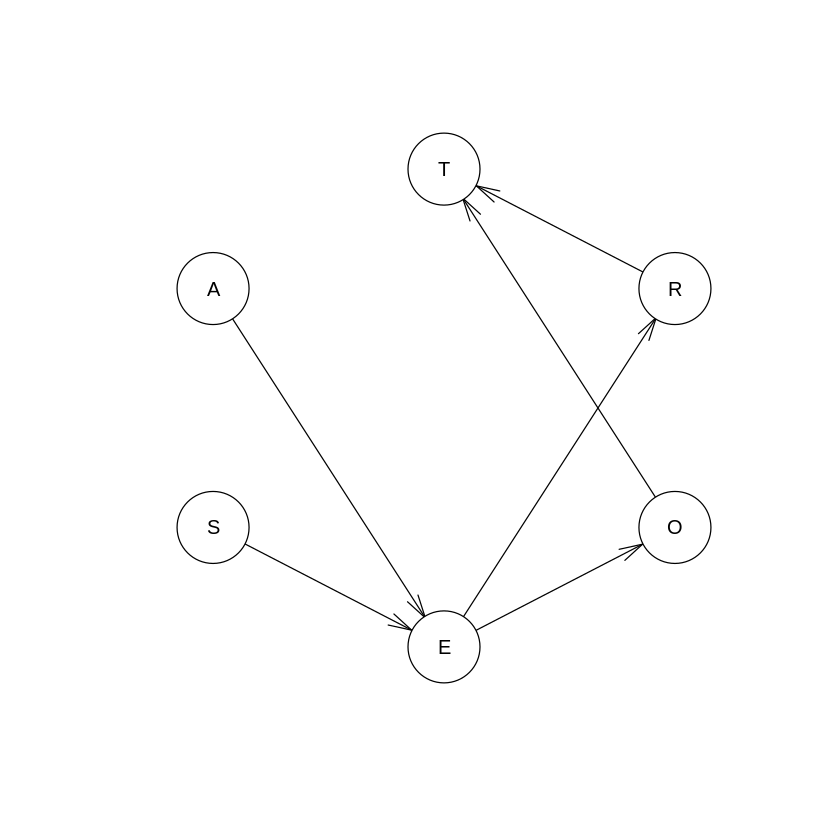

In [155]:
rm(list = ls())

setwd("/content")

# create an empty graph
dag <- empty.graph(nodes = c("A", "S", "E", "O", "R", "T"))

# Add in the edges
dag <- set.arc(dag, from = "A", to = "E") # age influences education
dag <- set.arc(dag, from = "S", to = "E") # sex influences education
dag <- set.arc(dag, from = "E", to = "O") # ....
dag <- set.arc(dag, from = "E", to = "R") # ....
dag <- set.arc(dag, from = "O", to = "T") # ....
dag <- set.arc(dag, from = "R", to = "T") # ....

plot(dag)

# Read in the data
survey <- read.table("survey.txt", header = TRUE, colClasses = "factor")

# define the states
A.lv <- c("young", "adult", "old")
S.lv <- c("M", "F")
E.lv <- c("high", "uni")
O.lv <- c("emp", "self")
R.lv <- c("small", "big")
T.lv <- c("car", "train", "other")

# specify the CPT for every node ("Expert Defined")
A.prob <- array(c(0.30, 0.50, 0.20), dim = 3, dimnames = list(A = A.lv))

S.prob <- array(c(0.60, 0.4), dim = 2, dimnames = list(S=S.lv))

O.prob <- array(c(0.96, 0.04, 0.92, 0.08), dim = c(2,2),
                dimnames = list(O=O.lv, E=E.lv))

R.prob <- array(c(0.25, 0.75, 0.20, 0.80), dim = c(2,2),
               dimnames = list(R = R.lv, E = E.lv))

E.prob <- array(c(0.75, 0.25, 0.72, 0.28, 0.88, 0.12, 0.64,
                  0.36, 0.70, 0.30, 0.90, 0.10), dim = c(2,3,2), dimnames = list(E=E.lv, A = A.lv, S = S.lv))

T.prob <- array(c(0.48, 0.42, 0.10, 0.56, 0.36, 0.08, 0.58,
                 0.24, 0.18, 0.70, 0.21, 0.09), dim = c(3,2,2),
                dimnames = list(T=T.lv, O = O.lv, R = R.lv))

cpt <- list(A = A.prob, S = S.prob, E = E.prob, O = O.prob, R = R.prob,
           T = T.prob)
bn <- custom.fit(dag, dist = cpt)

[1] "bn"

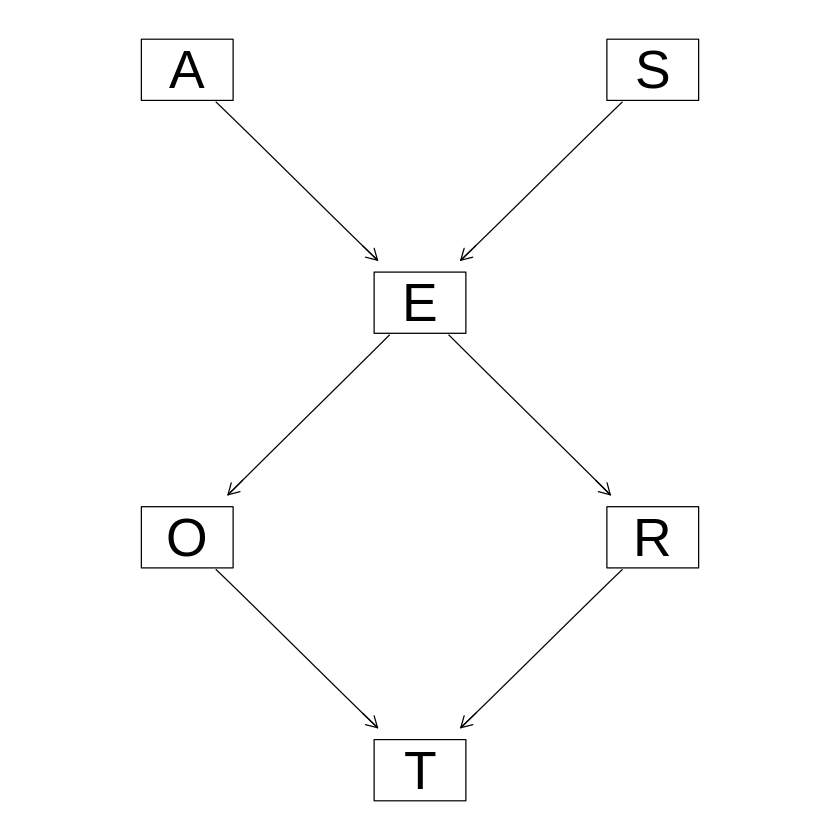

In [156]:
# Basic plotting
class(dag)
graphviz.plot(dag)

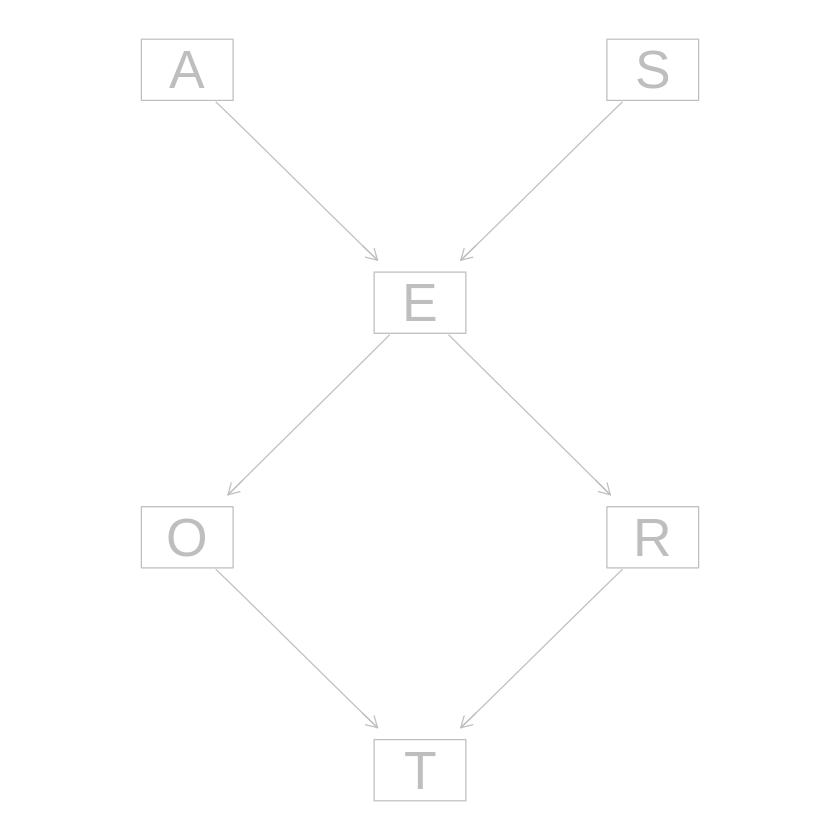

In [157]:
# carry out some basic 'highlighting'
hlight <- list(nodes = nodes(dag), arcs = arcs(dag), col = "grey", textCol = "grey")

pp <- graphviz.plot(dag, highlight = hlight)
renderGraph(pp)

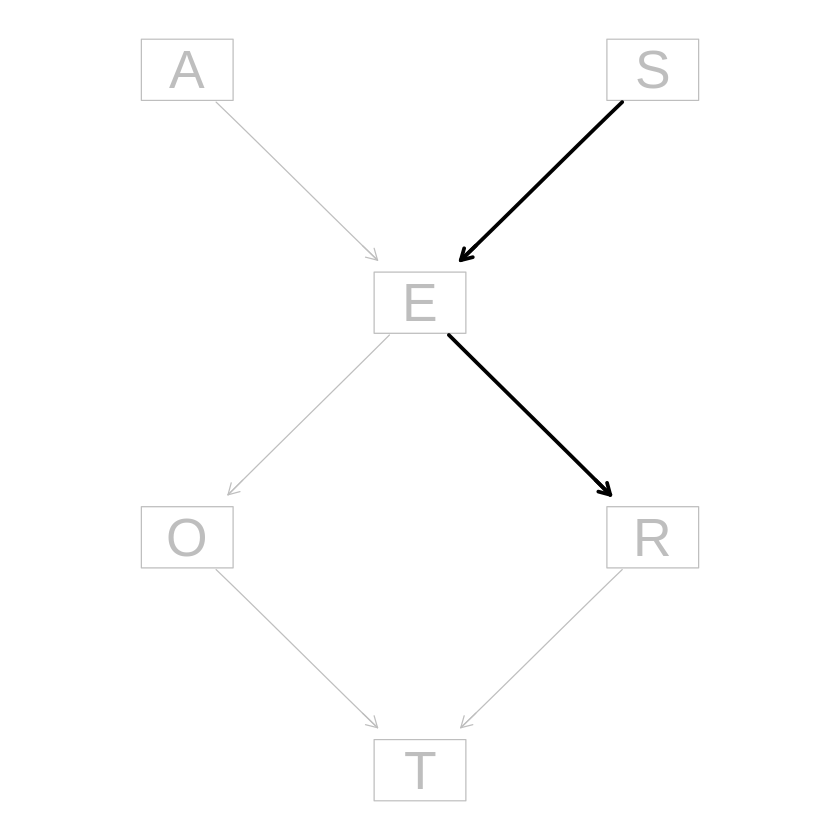

In [158]:
# carry out some basic 'highlighting' -- with 'emphasis'
# working with the edges first
edgeRenderInfo(pp) <- list(col = c("S~E" = "black", "E~R" = "black"), lwd = c("S~E" = 3, "E~R" = 3))
renderGraph(pp)

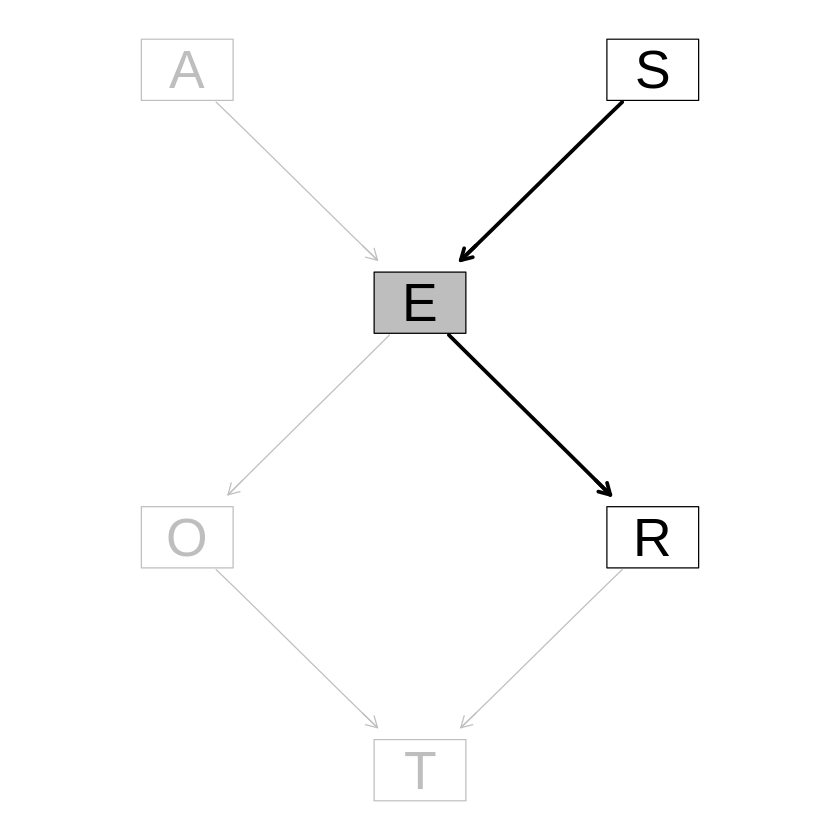

In [159]:
# working with the nodes next
nodeRenderInfo(pp) <- list(col = c("S" = "black", "E" = "black", "R" = "black"),
                          textCol = c("S" = "black", "E" = "black", "R" = "black"),
                          fill = c("E" = "grey"))
renderGraph(pp)


  Parameters of node T (multinomial distribution)

Conditional probability table:
 
, , R = big

       O
T              emp       self
  car   0.58469945 0.69230769
  other 0.19945355 0.15384615
  train 0.21584699 0.15384615

, , R = small

       O
T              emp       self
  car   0.54700855 0.75000000
  other 0.07692308 0.25000000
  train 0.37606838 0.00000000


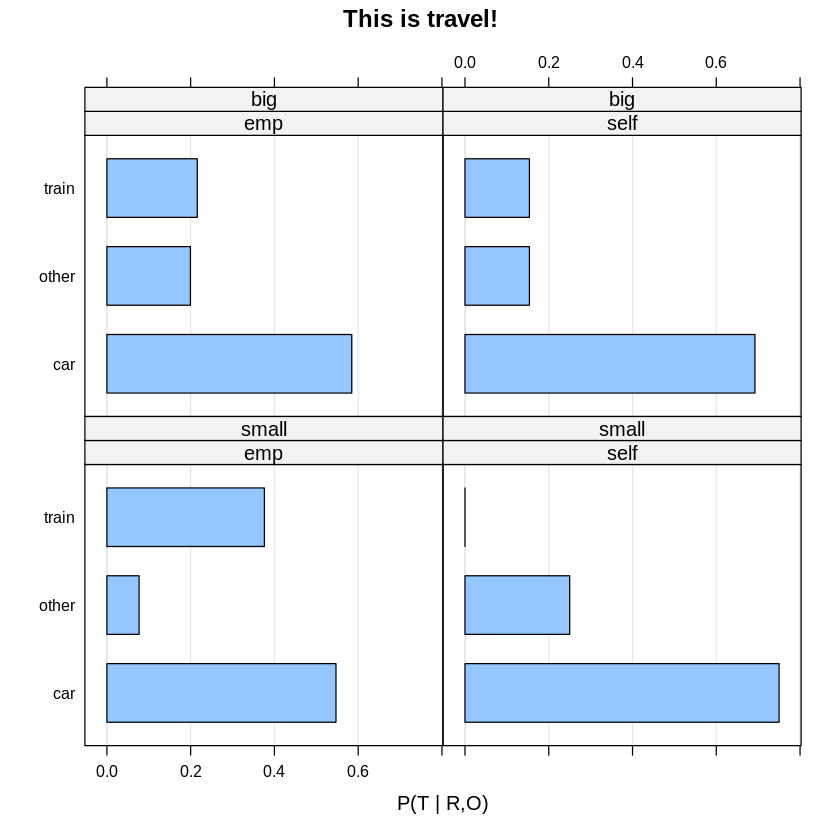

In [160]:
# Visualizing some of the paramaters
bn.mle <- bn.fit(dag, data = survey, method = "mle")
bn.mle$T

bn.fit.barchart(bn.mle$T, main = "This is travel!", xlab = "P(T | R,O)", ylab = "")

In [161]:
# Create some evidence + visualization
Evidence <- factor(c(rep("Unconditional", 3), rep("Female", 3), rep("Small City", 3)), levels = c("Unconditional", "Female", "Small City"))
levels(Evidence)

[1] "Unconditional" "Female"        "Small City"

In [162]:
Travel <- factor(rep(c("car", "train", "other"), 3), levels = c("car", "train", "other"))

distr <- data.frame(Evidence, Travel, Prob = c(0.5618, .2808, .15730, .5620, .2806, .1573, .4838, .4170, .0990))
head(distr)

,Evidence,Travel,Prob
,<fct>,<fct>,<dbl>
1,Unconditional,car,0.5618
2,Unconditional,train,0.2808
3,Unconditional,other,0.1573
4,Female,car,0.5620
5,Female,train,0.2806
6,Female,other,0.1573


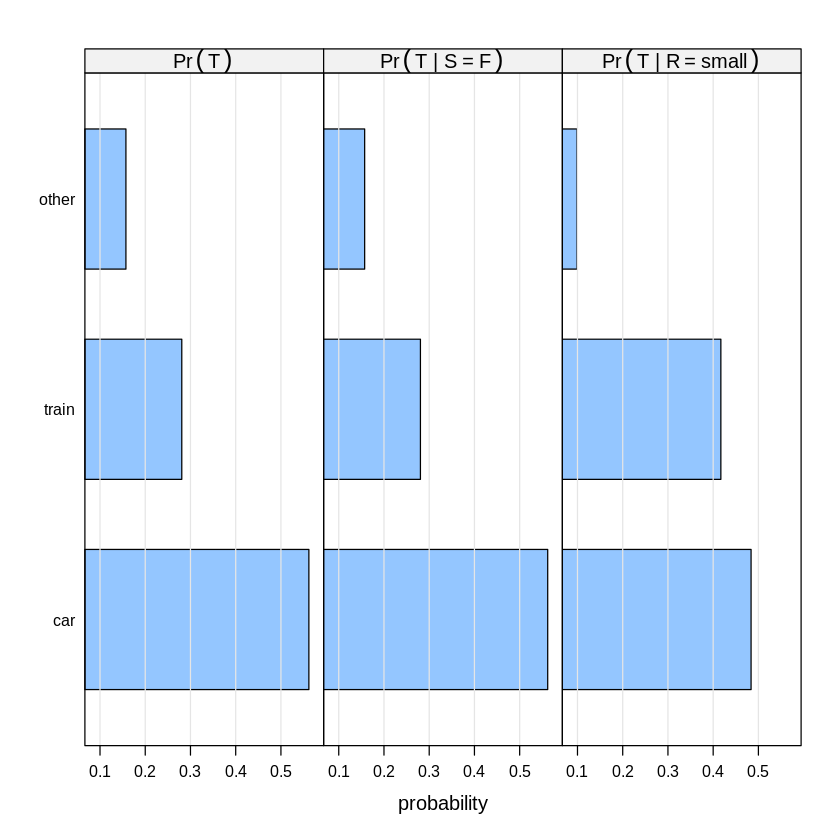

In [163]:
barchart(Travel ~ Prob | Evidence, data = distr,
   layout = c(3, 1), xlab = "probability",
   scales = list(alternating = 1, tck = c(1, 0)),
   strip = strip.custom(factor.levels =
     c(expression(Pr(T)),
       expression(Pr({T} * " | " * {S == F})),
       expression(Pr({T} * " | " * {R == small})))),
   panel = function(...) {
     panel.barchart(...)
     panel.grid(h = 0, v = -1)
   })

In [164]:
library(bnlearn)
library(gRbase)
library(gRain)

gr_bn <- as.grain(bn)
junction <- gRbase::compile(gr_bn)

In [165]:
jedu <- setEvidence(junction, nodes = "E", states = "high")

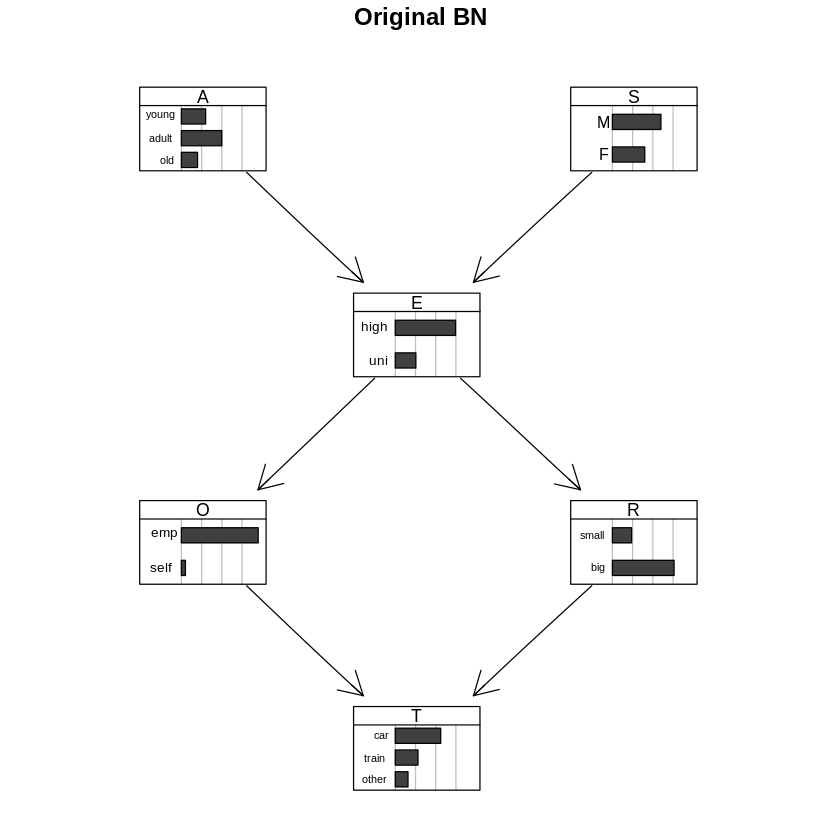

In [166]:
graphviz.chart(bn, grid = TRUE, main = "Original BN")

Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in O, replaced with a uniform distribution.”
Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in R, replaced with a uniform distribution.”


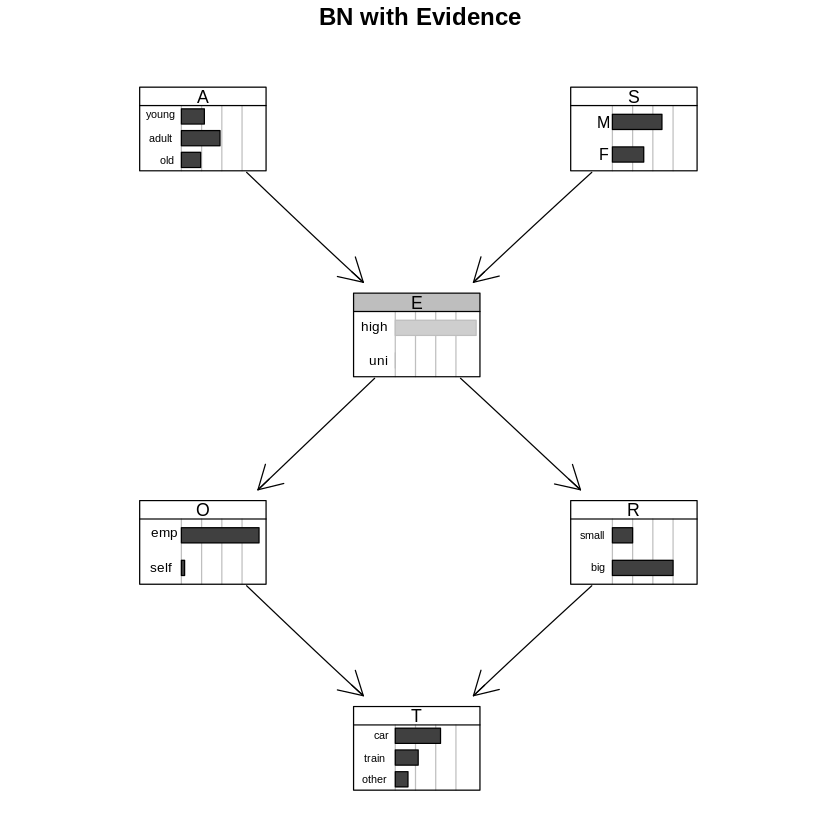

In [167]:
# now if you want to absorb information into this graph to include junction tree info (set evidence) then we highlight
graphviz.chart(
  as.bn.fit(jedu, including.evidence = TRUE),
  grid = TRUE, bar.col = c(A = "black", S = "black", E = "grey", O = "black", R = "black", T = "black"),
  strip.bg = c(A = "transparent", S = "transparent", E = "grey", O = "transparent", R = "transparent", T = "transparent"),
  main = "BN with Evidence"
)